In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Зададим функцию через символьные переменные
x1 = sym.Symbol('x1')
x2 = sym.Symbol('x2')

function = x1**3-2*x1+x2**3-24*x2**2+189*x2-486

# Начальная точка и ошибка
x_0 = np.array([0, -5])
epsilon = 0.001

In [3]:
def ExtremumNewton(x_0, function, epsilon):
    FUNC = sym.lambdify([x1, x2], function)
    # Ищем общий вид для гессиана и градиента заданной функции
    f_diff_1 = sym.diff(function, x1)
    f_diff_2 = sym.diff(function, x2)
    F_DIFF = np.array([sym.lambdify([x1, x2], f_diff_1), sym.lambdify([x1, x2], f_diff_2)])
    
    # Гессиан
    f_diff_11 = sym.diff(f_diff_1, x1)
    f_diff_12 = sym.diff(f_diff_1, x2)
    f_diff_22 = sym.diff(f_diff_2, x2)
    G = np.array([[sym.lambdify([x1, x2], f_diff_11), sym.lambdify([x1, x2], f_diff_12)],[sym.lambdify([x1, x2], f_diff_12), sym.lambdify([x1, x2], f_diff_22)]])
    
    iters = 0  # Для записи количества итераций
    
    # Для записи точек, для построения график
    x_progress_list = [x_0[0]]
    y_progress_list = [x_0[1]]
    
    x_1 = np.copy(x_0) + 1
    f_diff = np.array([F_DIFF[0](x_0[0], x_0[1]), F_DIFF[1](x_0[0], x_0[1])])
    #while FUNC(x_1[0], x_1[1]) < FUNC(x_0[0], x_0[1]):
    while abs(np.linalg.norm(x_0 - x_1)) and abs(FUNC(x_0[0],x_0[1]) - FUNC(x_1[0],x_1[1])) > epsilon:
        x_0 = np.copy(x_1)
        gessian = np.array([[G[0][0](x_0[0], x_0[1]), G[0][1](x_0[0], x_0[1])],[G[1][0](x_0[0], x_0[1]), G[1][1](x_0[0], x_0[1])]])
        f_diff = np.array([F_DIFF[0](x_0[0], x_0[1]), F_DIFF[1](x_0[0], x_0[1])])
        x_1 = x_0 - np.dot(np.linalg.inv(gessian), f_diff)
        
        # Добавляем в список для движения точки
        x_progress_list.append(x_1[0])
        y_progress_list.append(x_1[1])
        iters += 1
    
    return x_1, iters, x_progress_list, y_progress_list

In [4]:
RES = ExtremumNewton(x_0, function, epsilon)
print("Local Minimum: ", RES[0])

Local Minimum:  [0.81649658 6.99995452]


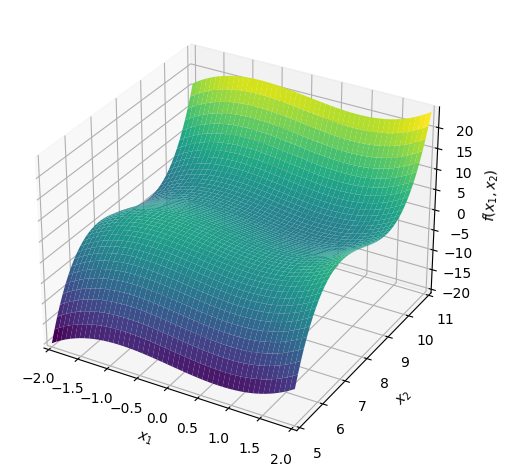

In [5]:
sym.plotting.plot3d(x1**3-2*x1+x2**3-24*x2**2+189*x2-486, (x1, -2,2), (x2, 5, 11))

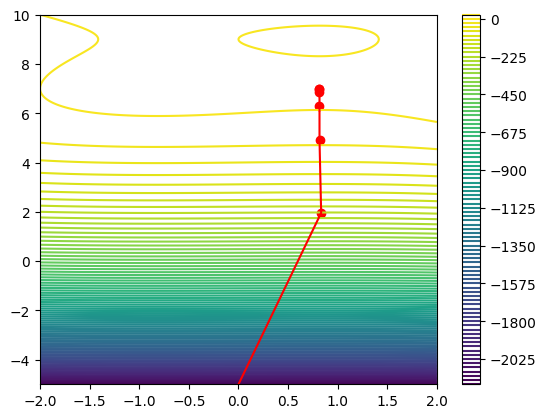

In [6]:
# Строим линии уровня
xlist = np.linspace(-2, 2, 1000)
ylist = np.linspace(-5, 10, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = X**3-2*X+Y**3-24*Y**2+189*Y-486
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z, levels = 100)
fig.colorbar(cp) # Add a colorbar to a plot
ax.scatter(RES[2], RES[3], color = "red")
ax.plot(RES[2], RES[3], color = "red")
plt.show()

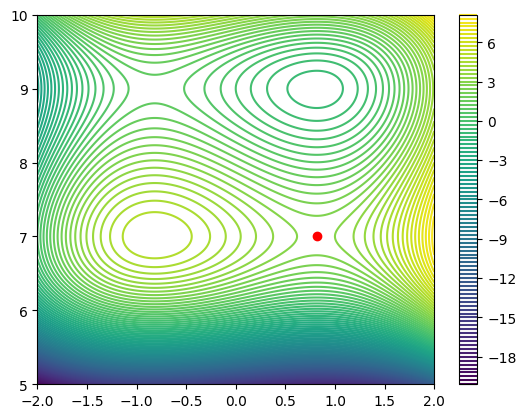

In [7]:
# Строим линии уровня
xlist = np.linspace(-2, 2, 1000)
ylist = np.linspace(5, 10, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = X**3-2*X+Y**3-24*Y**2+189*Y-486
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z, levels = 100)
fig.colorbar(cp) # Add a colorbar to a plot
ax.scatter(RES[0][0], RES[0][1], color = "red")
plt.show()

In [8]:
# Попробуем задать другое начальное условие
x_0 = np.array([0, 7.5])

RES2 = ExtremumNewton(x_0, function, epsilon)
print("Local Minimum: ", RES2[0])

Local Minimum:  [0.81649658 9.00000005]


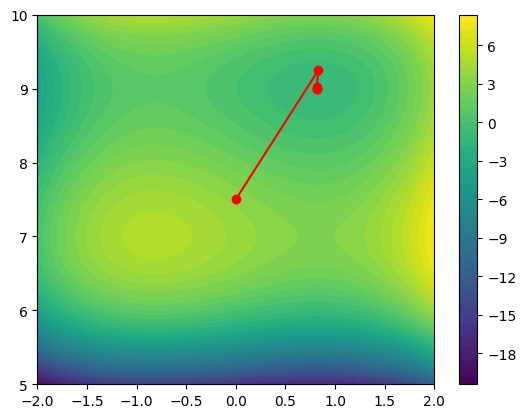

In [10]:
# Строим линии уровня
xlist = np.linspace(-2, 2, 1000)
ylist = np.linspace(5, 10, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = X**3-2*X+Y**3-24*Y**2+189*Y-486
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, levels = 50)
fig.colorbar(cp) # Add a colorbar to a plot
ax.scatter(RES2[2], RES2[3], color = "red")
ax.plot(RES2[2], RES2[3], color = "red")
plt.show()